#### **Imports**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from poetry_project.scraper.author_scraper import get_poets_by_poem_range
from poetry_project.pipeline import build_authors_database, load_metrics, load_authors_database
from poetry_project.utils.analysis_utils import compute_author_metrics
from poetry_project.analysis.visualizations import boxplot_poem_lengths

In [19]:
metrics = load_metrics()
metrics.head()

,author,birth_year,nationality,avg_poem_length,rhyme_percentage,poem_count,constant_syllable_percentage
0,Carol Ann Duffy,1955,United Kingdom,46.231481,3.703704,108,4.629630
1,Christina Rossetti,1830,United Kingdom,68.013514,68.918919,74,1.351351
2,Elizabeth Barrett Browning,1806,United Kingdom,86.800000,77.142857,35,5.714286
3,Elizabeth Jennings,1926,United Kingdom,47.906977,13.953488,43,16.279070
4,Emily Dickinson,1830,United States,35.243478,3.478261,115,1.739130


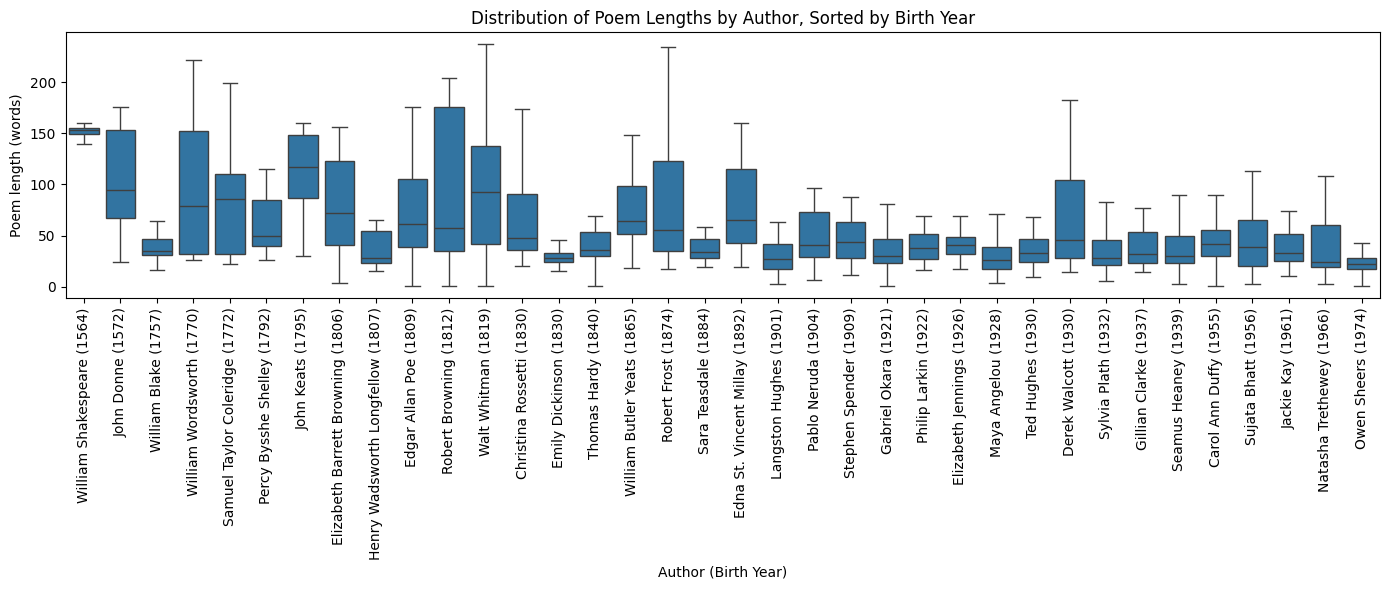

In [20]:
# Load full authors database
authors = load_authors_database()
metrics = compute_author_metrics(authors)
boxplot_poem_lengths(authors)

In [21]:
# Keep only authors with valid birth years
metrics = metrics.dropna(subset=["birth_year"])
metrics = metrics[metrics["birth_year"].apply(lambda x: str(x).isdigit())]
metrics["birth_year"] = metrics["birth_year"].astype(int)

# Sort by birth year
metrics = metrics.sort_values("birth_year")

# Create labels: "Author (Year)"
metrics["author_label"] = metrics.apply(
    lambda row: f"{row['author']} ({row['birth_year']})", axis=1
)

In [22]:
corr, p_value = pearsonr(metrics["birth_year"], metrics["avg_poem_length"])
print(f"Pearson correlation: {corr:.3f} (p-value: {p_value:.4f})")

Pearson correlation: -0.672 (p-value: 0.0000)


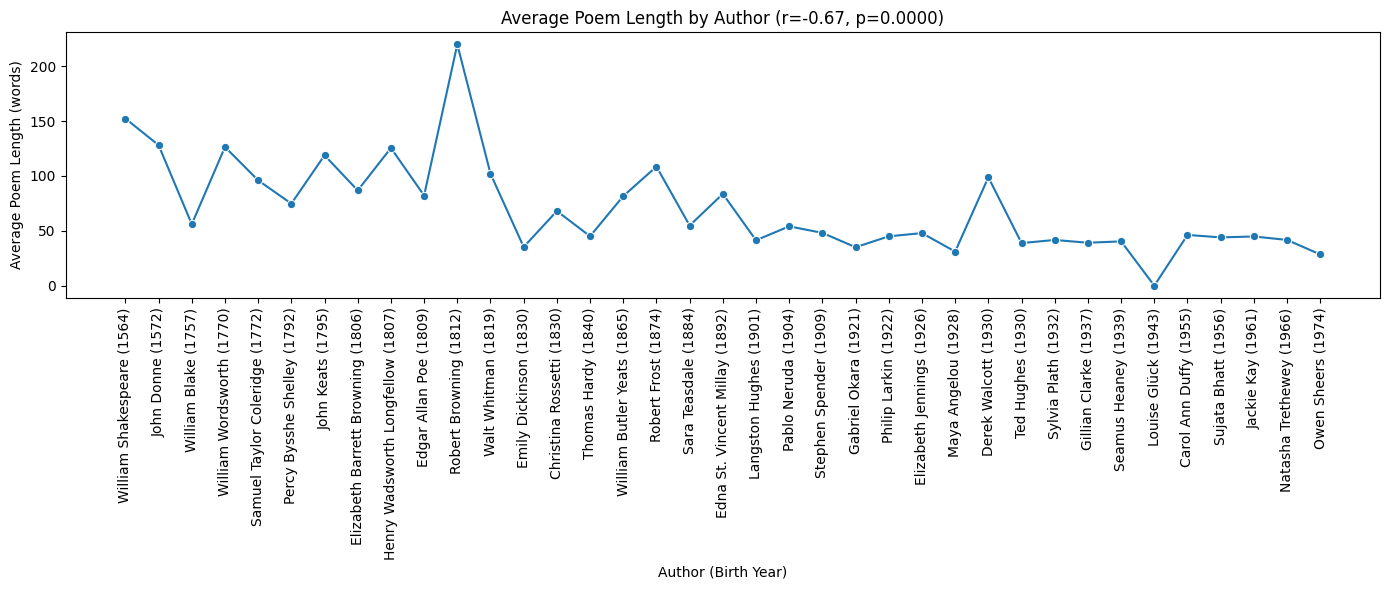

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=metrics,
    x="author_label",
    y="avg_poem_length",
    marker="o"
)
plt.xticks(rotation=90)
plt.xlabel("Author (Birth Year)")
plt.ylabel("Average Poem Length (words)")
plt.title(f"Average Poem Length by Author (r={corr:.2f}, p={p_value:.4f})")
plt.tight_layout()
plt.show()

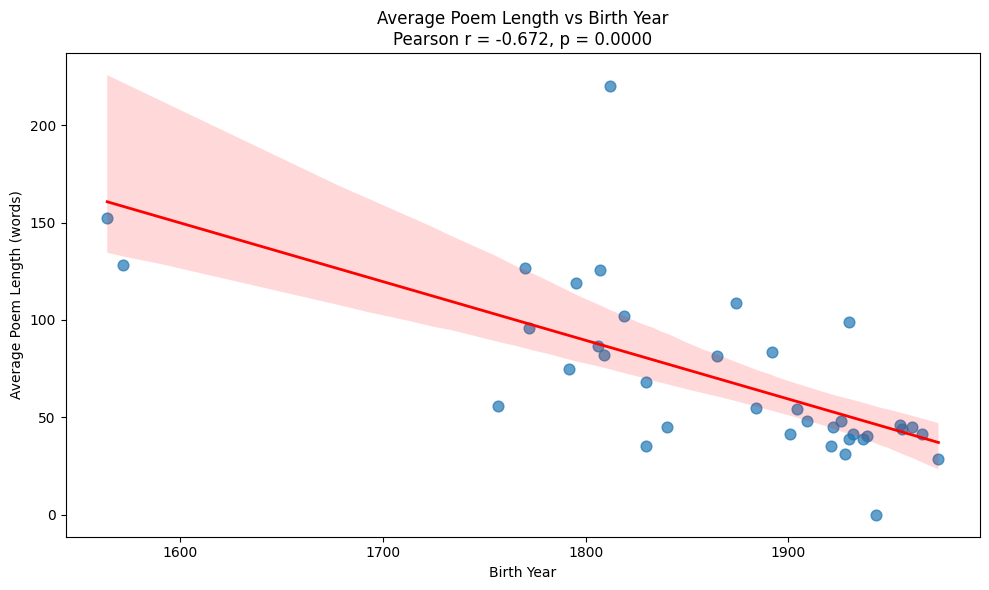

In [26]:
# Plot scatter + regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=metrics,
    x="birth_year",
    y="avg_poem_length",
    scatter_kws={"s": 60, "alpha": 0.7},
    line_kws={"color": "red", "lw": 2}
)
plt.xlabel("Birth Year")
plt.ylabel("Average Poem Length (words)")
plt.title(f"Average Poem Length vs Birth Year\nPearson r = {corr:.3f}, p = {p_value:.4f}")
plt.tight_layout()
plt.show()